کد مربوطه به مقاله ارسالی با عنوان:

### ترکیب روش آسیب مغزی بهینه و منظم‌سازی تُنُک ‌ در کوچک‌سازی یک مدل یادگیری عمیق

به لحاظ ماهیت تصادفی مقداردهی اولیه‌ی وزنهای شبکه‌های عصبی و روال آموزش شبکه، اختلافات جزیی در اجراهای مختلف وجود دارد.

M. Amintoosi, m.amintoosi at gmail.com

In [1]:
import os, time
if hasattr(time, 'tzset'):
    os.environ['TZ'] = 'Asia/Tehran'
    time.tzset()
print(time.strftime('%Y/​%m/%d, %X'))

2021/​06/16, 14:27:24


In [2]:
import torch
torch.manual_seed(1)
import random
random.seed(1)

In [9]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!pip install pycm

     |████████████████████████████████| 71kB 5.7MB/s 
     |████████████████████████████████| 573kB 10.9MB/s 


In [4]:
!git clone https://github.com/mamintoosi/Reg-OBD-for-VGG-Pruning

Cloning into 'CNN-Pruning'...
remote: Enumerating objects: 170, done.
remote: Counting objects: 100% (170/170), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 170 (delta 101), reused 119 (delta 50), pack-reused 0
Receiving objects: 100% (170/170), 126.72 KiB | 5.76 MiB/s, done.
Resolving deltas: 100% (101/101), done.


In [5]:
%cd Reg-OBD-for-VGG-Pruning

/content/CNN-Pruning


In [ ]:
!ls models

In [6]:
%%time
# Transfer Learning: Train the VGG16 model
torch.manual_seed(1)
random.seed(1)
# Download a pre-trained VGG16 model and train it
%run finetune_SpReg_pds.py --train --use-cuda \
  --train_epoch 10 --ds_name 'STL10' \
  --output_model 'vgg'

STL10


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth



Using CUDA...



Extracting /content/data/stl10_binary.tar.gz to /content/data
Files already downloaded and verified


Accuracy on  val :0.882 	 Loss:0.349
Accuracy on  val :0.882 	 Loss:0.374
Accuracy on  val :0.901 	 Loss:0.329
Accuracy on  val :0.891 	 Loss:0.440
Accuracy on  val :0.924 	 Loss:0.305
Accuracy on  val :0.915 	 Loss:0.337
Accuracy on  val :0.909 	 Loss:0.379
Accuracy on  val :0.910 	 Loss:0.395
Accuracy on  val :0.905 	 Loss:0.414
Accuracy on  val :0.885 	 Loss:0.572

Finished fine tuning.
Accuracy on  test :0.879 	 Loss:0.559
CPU times: user 7min 11s, sys: 33.9 s, total: 7min 45s
Wall time: 10min 21s


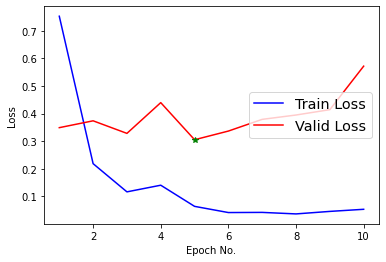

4


In [7]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,len(Train_loss)+1), Train_loss, label='Train Loss', color='blue')
ax.plot(np.arange(1,len(Train_loss)+1), Val_loss, label='Valid Loss', color = 'red')
ax.plot(np.argmin(Val_loss)+1, np.min(Val_loss),'g*')
# legend = ax.legend(loc='upper right', fontsize='x-large')
legend = ax.legend(loc='center right', fontsize='x-large')
plt.xlabel('Epoch No.')
plt.ylabel('Loss')
plt.show()
print(np.argmin(Val_loss))

STL10
Using CUDA...
Files already downloaded and verified
Files already downloaded and verified
Accuracy on  test :0.920 	 Loss:0.305
ACC=0.92
0:0.97	1:0.96	2:0.97	3:0.92	4:0.95	5:0.89	6:0.95	7:0.96	8:0.99	9:0.98
FNR:0.08, FPR:0.01
TNR:0.99, TPR:0.92
CPU times: user 29.6 s, sys: 2.98 s, total: 32.6 s
Wall time: 33.1 s


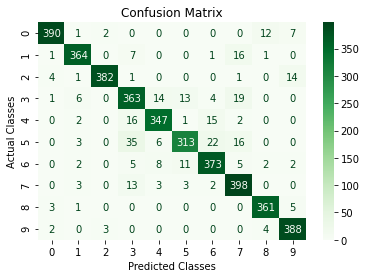

In [11]:
%%time
# Test report the trained model 
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --test --use-cuda --ds_name 'STL10' \
  --input_model 'vgg' --output_model 'vgg'

In [ ]:
!ls -as models

total 524648
     4 .       4 ..       0 for_models.txt  524640 vgg.pt


In [12]:
%%time
# Pruning the trained model using HSQGL12 method
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --prune --use-cuda --train_epoch 20 --reg_name 'HSQGL12' --ds_name 'STL10' \
  --input_model 'vgg' --output_model 'HSQGL12' --landa 1e-5

STL10
Using CUDA...
Files already downloaded and verified
Files already downloaded and verified
Using Regularization:  HSQGL12
Accuracy on  val :0.924 	 Loss:0.305
Retraining with regularization ... 


Accuracy on  val :0.854 	 Loss:0.568
Accuracy on  val :0.560 	 Loss:1.212
Accuracy on  val :0.815 	 Loss:0.654
Accuracy on  val :0.790 	 Loss:0.685
Accuracy on  val :0.700 	 Loss:1.274
Accuracy on  val :0.699 	 Loss:0.867
Accuracy on  val :0.777 	 Loss:0.629
Accuracy on  val :0.656 	 Loss:1.333
Accuracy on  val :0.703 	 Loss:0.841
Accuracy on  val :0.825 	 Loss:0.513
Accuracy on  val :0.717 	 Loss:0.890
Accuracy on  val :0.832 	 Loss:0.511
Accuracy on  val :0.768 	 Loss:0.799
Accuracy on  val :0.658 	 Loss:1.515
Accuracy on  val :0.809 	 Loss:0.561
Accuracy on  val :0.608 	 Loss:1.639
Accuracy on  val :0.584 	 Loss:2.071
Accuracy on  val :0.739 	 Loss:0.868
Accuracy on  val :0.750 	 Loss:0.789
Accuracy on  val :0.783 	 Loss:0.649

Finished fine tuning.
Accuracy on  test :0.794 	 Loss:0.637
CPU times: user 20min 31s, sys: 28.7 s, total: 21min
Wall time: 21min 19s


STL10
Using CUDA...
Files already downloaded and verified
Files already downloaded and verified
Accuracy on  test :0.835 	 Loss:0.491
ACC=0.83
0:0.94	1:0.89	2:0.93	3:0.87	4:0.89	5:0.78	6:0.92	7:0.91	8:0.97	9:0.97
FNR:0.17, FPR:0.02
TNR:0.98, TPR:0.83
CPU times: user 29 s, sys: 2.77 s, total: 31.7 s
Wall time: 32 s


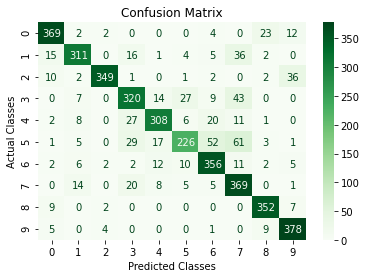

In [13]:
%%time
# Test report for HSQGL12 method
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --test --use-cuda --ds_name 'STL10' \
  --input_model 'HSQGL12' --output_model 'HSQGL12'

In [ ]:
!ls -as models

total 1049288
     4 .       4 ..       0 for_models.txt  524640 HSQGL12.pt  524640 vgg.pt


In [15]:
# Pruning the trained model using OBD method
%%time
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --prune --use-cuda --ds_name 'STL10' \
  --input_model 'vgg' --output_model 'OBD' \
  --eat 3

STL10
Using CUDA...
Files already downloaded and verified
Files already downloaded and verified
Accuracy on  val :0.924 	 Loss:0.305
5
Number of prunning iterations to reduce 70% filters: 5
Iter:  1 / 5
Ranking filters.. 
Layers that will be prunned {0: 16, 21: 64, 19: 62, 17: 60, 2: 8, 26: 67, 24: 80, 28: 67, 10: 21, 7: 13, 12: 22, 14: 22, 5: 10}
Prunning filters.. 
Filters prunned 12.121212121212125%
Accuracy on  val :0.588 	 Loss:1.578
Fine tuning to recover from prunning iteration.


Accuracy on  val :0.883 	 Loss:0.350
Accuracy on  val :0.876 	 Loss:0.387
Accuracy on  val :0.818 	 Loss:0.663

Finished fine tuning.
Iter:  2 / 5
Ranking filters.. 
Layers that will be prunned {26: 72, 5: 8, 24: 64, 17: 49, 19: 65, 28: 125, 12: 10, 21: 62, 14: 17, 2: 7, 0: 6, 10: 19, 7: 8}
Prunning filters.. 
Filters prunned 24.24242424242425%
Accuracy on  val :0.642 	 Loss:1.126
Fine tuning to recover from prunning iteration.


Accuracy on  val :0.855 	 Loss:0.423
Accuracy on  val :0.875 	 Loss:0.420
Accuracy on  val :0.882 	 Loss:0.400

Finished fine tuning.
Iter:  3 / 5
Ranking filters.. 
Layers that will be prunned {10: 32, 26: 71, 17: 67, 21: 76, 28: 72, 24: 68, 12: 26, 19: 64, 5: 5, 7: 7, 14: 21, 2: 2, 0: 1}
Prunning filters.. 
Filters prunned 36.36363636363637%
Accuracy on  val :0.758 	 Loss:0.691
Fine tuning to recover from prunning iteration.


Accuracy on  val :0.842 	 Loss:0.581
Accuracy on  val :0.891 	 Loss:0.355
Accuracy on  val :0.865 	 Loss:0.453

Finished fine tuning.
Iter:  4 / 5
Ranking filters.. 
Layers that will be prunned {24: 70, 12: 31, 14: 30, 21: 75, 26: 70, 10: 18, 19: 65, 17: 70, 28: 47, 5: 7, 7: 20, 2: 4, 0: 5}
Prunning filters.. 
Filters prunned 48.484848484848484%
Accuracy on  val :0.497 	 Loss:1.533
Fine tuning to recover from prunning iteration.


Accuracy on  val :0.843 	 Loss:0.441
Accuracy on  val :0.835 	 Loss:0.624
Accuracy on  val :0.854 	 Loss:0.465

Finished fine tuning.
Iter:  5 / 5
Ranking filters.. 
Layers that will be prunned {28: 53, 24: 65, 26: 64, 19: 71, 17: 71, 10: 42, 12: 28, 21: 58, 14: 30, 7: 9, 5: 14, 0: 5, 2: 2}
Prunning filters.. 
Filters prunned 60.60606060606061%
Accuracy on  val :0.336 	 Loss:1.913
Fine tuning to recover from prunning iteration.


Accuracy on  val :0.812 	 Loss:0.572
Accuracy on  val :0.807 	 Loss:0.551
Accuracy on  val :0.818 	 Loss:0.550

Finished fine tuning.
Accuracy on  test :0.814 	 Loss:0.547
CPU times: user 20min 27s, sys: 40.6 s, total: 21min 7s
Wall time: 21min 34s


STL10
Using CUDA...
Files already downloaded and verified
Files already downloaded and verified
Accuracy on  test :0.814 	 Loss:0.547
ACC=0.81
0:0.96	1:0.86	2:0.96	3:0.84	4:0.90	5:0.86	6:0.93	7:0.88	8:0.91	9:0.87
FNR:0.19, FPR:0.02
TNR:0.98, TPR:0.81
CPU times: user 20 s, sys: 2.69 s, total: 22.7 s
Wall time: 24 s


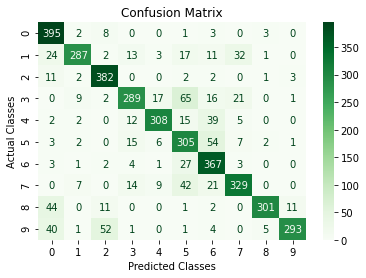

In [16]:
%%time
# Test report for OBD method
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --test --use-cuda --ds_name 'STL10' \
  --input_model 'OBD' --output_model 'OBD'

In [ ]:
!ls -as models

total 1246288
     4 .        0 for_models.txt  197000 OBD.pt
     4 ..  524640 HSQGL12.pt	  524640 vgg.pt


In [18]:
%%time
# Train HSQGL12_OBD
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --prune --use-cuda --ds_name 'STL10' \
  --input_model 'HSQGL12' --output_model 'HSQGL12_OBD' \
  --eat 3

STL10
Using CUDA...
Files already downloaded and verified
Files already downloaded and verified
Accuracy on  val :0.832 	 Loss:0.511
5
Number of prunning iterations to reduce 70% filters: 5
Iter:  1 / 5
Ranking filters.. 
Layers that will be prunned {0: 10, 2: 4, 26: 89, 17: 68, 21: 87, 19: 71, 14: 21, 28: 61, 12: 14, 10: 12, 24: 65, 7: 8, 5: 2}
Prunning filters.. 
Filters prunned 12.121212121212125%
Accuracy on  val :0.785 	 Loss:0.645
Fine tuning to recover from prunning iteration.


Accuracy on  val :0.541 	 Loss:1.259
Accuracy on  val :0.697 	 Loss:0.869
Accuracy on  val :0.642 	 Loss:1.064

Finished fine tuning.
Iter:  2 / 5
Ranking filters.. 
Layers that will be prunned {21: 108, 24: 59, 26: 123, 28: 122, 19: 77, 17: 15, 12: 1, 0: 1, 14: 3, 2: 1, 7: 1, 10: 1}
Prunning filters.. 
Filters prunned 24.24242424242425%
Accuracy on  val :0.640 	 Loss:1.062
Fine tuning to recover from prunning iteration.


Accuracy on  val :0.729 	 Loss:0.777
Accuracy on  val :0.742 	 Loss:0.856
Accuracy on  val :0.709 	 Loss:1.128

Finished fine tuning.
Iter:  3 / 5
Ranking filters.. 
Layers that will be prunned {28: 60, 24: 89, 19: 89, 17: 64, 12: 14, 26: 71, 21: 90, 10: 13, 14: 17, 5: 3, 2: 1, 7: 1}
Prunning filters.. 
Filters prunned 36.36363636363637%
Accuracy on  val :0.661 	 Loss:1.318
Fine tuning to recover from prunning iteration.


Accuracy on  val :0.776 	 Loss:0.668
Accuracy on  val :0.657 	 Loss:0.998
Accuracy on  val :0.793 	 Loss:0.695

Finished fine tuning.
Iter:  4 / 5
Ranking filters.. 
Layers that will be prunned {26: 69, 28: 42, 24: 62, 21: 53, 17: 102, 12: 33, 14: 33, 7: 15, 19: 68, 10: 24, 5: 6, 2: 2, 0: 3}
Prunning filters.. 
Filters prunned 48.484848484848484%
Accuracy on  val :0.719 	 Loss:0.827
Fine tuning to recover from prunning iteration.


Accuracy on  val :0.771 	 Loss:0.713
Accuracy on  val :0.788 	 Loss:0.679
Accuracy on  val :0.788 	 Loss:0.666

Finished fine tuning.
Iter:  5 / 5
Ranking filters.. 
Layers that will be prunned {28: 82, 24: 57, 17: 77, 14: 37, 12: 36, 26: 51, 5: 11, 10: 37, 19: 60, 21: 40, 2: 3, 0: 7, 7: 14}
Prunning filters.. 
Filters prunned 60.60606060606061%
Accuracy on  val :0.594 	 Loss:1.159
Fine tuning to recover from prunning iteration.


Accuracy on  val :0.753 	 Loss:0.795
Accuracy on  val :0.799 	 Loss:0.609
Accuracy on  val :0.736 	 Loss:0.837

Finished fine tuning.
Accuracy on  test :0.739 	 Loss:0.828
CPU times: user 22min, sys: 41.7 s, total: 22min 42s
Wall time: 23min 4s


STL10
Using CUDA...
Files already downloaded and verified
Files already downloaded and verified
Accuracy on  test :0.800 	 Loss:0.589
ACC=0.80
0:0.94	1:0.90	2:0.94	3:0.86	4:0.83	5:0.80	6:0.89	7:0.85	8:0.97	9:0.90
FNR:0.20, FPR:0.02
TNR:0.98, TPR:0.80
CPU times: user 22.7 s, sys: 2.55 s, total: 25.3 s
Wall time: 25.8 s


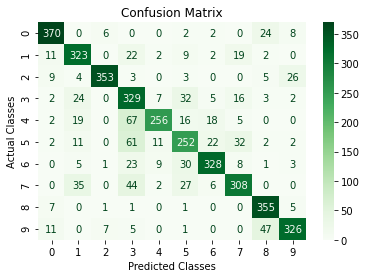

In [19]:
%%time
# Test report for HSQGL12+OBD method
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --test --use-cuda --ds_name 'STL10' \
  --input_model 'HSQGL12_OBD' --output_model 'HSQGL12_OBD'

In [ ]:
# Print Model Sizes
!ls -as models
# !stat -c '%y' models/vgg_HSQGL12_OBD.pt
# print(time.strftime('%Y/​%m/%d, %X'))

total 1605008
     4 .        0 for_models.txt  524640 HSQGL12.pt  524640 vgg.pt
     4 ..  326440 HSQGL12_OBD.pt  229280 OBD.pt


In [20]:
%%time
# Pruning the OBD pruned model using HSQGL12 method
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --prune --use-cuda --train_epoch 20 --reg_name 'HSQGL12' --ds_name 'STL10' \
  --input_model 'OBD' --output_model 'OBD_HSQGL12' --landa 1e-5

STL10
Using CUDA...
Files already downloaded and verified
Files already downloaded and verified
Using Regularization:  HSQGL12
Accuracy on  val :0.818 	 Loss:0.550
Retraining with regularization ... 


Accuracy on  val :0.813 	 Loss:0.615
Accuracy on  val :0.804 	 Loss:0.645
Accuracy on  val :0.819 	 Loss:0.577
Accuracy on  val :0.758 	 Loss:0.871
Accuracy on  val :0.791 	 Loss:0.771
Accuracy on  val :0.756 	 Loss:0.850
Accuracy on  val :0.807 	 Loss:0.651
Accuracy on  val :0.797 	 Loss:0.768
Accuracy on  val :0.828 	 Loss:0.575
Accuracy on  val :0.796 	 Loss:0.750
Accuracy on  val :0.807 	 Loss:0.695
Accuracy on  val :0.799 	 Loss:0.671
Accuracy on  val :0.752 	 Loss:0.833
Accuracy on  val :0.803 	 Loss:0.693
Accuracy on  val :0.745 	 Loss:0.909
Accuracy on  val :0.790 	 Loss:0.620
Accuracy on  val :0.796 	 Loss:0.806
Accuracy on  val :0.777 	 Loss:0.815
Accuracy on  val :0.826 	 Loss:0.552
Accuracy on  val :0.817 	 Loss:0.602

Finished fine tuning.
Accuracy on  test :0.817 	 Loss:0.593
CPU times: user 10min 40s, sys: 27.7 s, total: 11min 8s
Wall time: 11min 39s


In [21]:
!ls -as models

total 1616248
     4 .        0 for_models.txt  524640 HSQGL12.pt	 189972 OBD.pt
     4 ..  187016 HSQGL12_OBD.pt  189972 OBD_HSQGL12.pt  524640 vgg.pt


STL10
Using CUDA...
Files already downloaded and verified
Files already downloaded and verified
Accuracy on  test :0.822 	 Loss:0.555
ACC=0.82
0:0.91	1:0.87	2:0.94	3:0.90	4:0.91	5:0.79	6:0.92	7:0.86	8:0.97	9:0.95
FNR:0.18, FPR:0.02
TNR:0.98, TPR:0.82
CPU times: user 20.3 s, sys: 2.69 s, total: 23 s
Wall time: 23.6 s


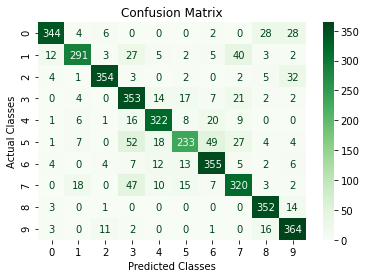

In [24]:
%%time
# Test report for OBD+HSQGL12 method
torch.manual_seed(1)
random.seed(1)
%run finetune_SpReg_pds.py --test --use-cuda --ds_name 'STL10' \
  --input_model 'OBD_HSQGL12' --output_model 'OBD_HSQGL12'

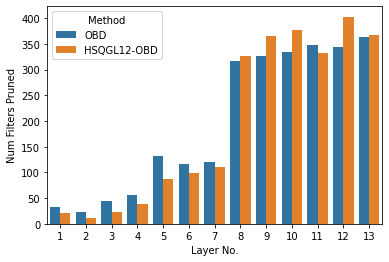

In [25]:
%matplotlib inline
# نمایش تعداد فیلترهای هرس شده در هر لایه
pkl_file = open('STL10_OBD_dic.pkl','rb')
dic = pkl.load(pkl_file)
dic_obd = bar_filters_pruned(dic)

pkl_file = open('STL10_HSQGL12_OBD_dic.pkl','rb')
dic = pkl.load(pkl_file)
dic_reg_obd = bar_filters_pruned(dic)

d = {
    'OBD': dic_obd,
    'HSQGL12-OBD': dic_reg_obd
}
df = pd.DataFrame(d)
df1 = df.stack().reset_index().rename(columns={'level_1': 'Method', 0: 'Num Filters Pruned'})
df1.rename(columns={"level_0": "Layer No."},inplace=True)
sns.barplot(x=df1['Layer No.'], y='Num Filters Pruned', data=df1, hue='Method')

In [26]:
!ls -as models

total 1616248
     4 .        0 for_models.txt  524640 HSQGL12.pt	 189972 OBD.pt
     4 ..  187016 HSQGL12_OBD.pt  189972 OBD_HSQGL12.pt  524640 vgg.pt


In [27]:
models_dir = 'models/'
eps = 1e-4
model = torch.load('models/vgg.pt', map_location=lambda storage, loc: storage)
te, _ = num_parameters(model,eps)
print('Total Parameters:', te)
mdl_list = ['vgg.pt', 'HSQGL12.pt', 'OBD.pt', 'HSQGL12_OBD.pt', 'OBD_HSQGL12.pt']
print('MDL \t\t ne \t\t ze \t\t ze/te \t 1-ze/te ne/te \t 1-ne/te ')
print('MDL \t ne \t ze \t ze/te \t 1-ze/te \t ne/te \t 1-ne/te ')
for mdl in mdl_list:
  model_file_name = models_dir+mdl
  model = torch.load(model_file_name, map_location=lambda storage, loc: storage)
  num_el, ze = num_parameters(model,eps)
  print("{:15s}\t {} \t {} \t {:.3f} \t {:.3f} \t {:.3f} \t {:.3f}".format(\
          mdl,num_el, ze, ze/te, 1-ze/te, num_el/te, 1-num_el/te))

Total Parameters: 134289088
MDL 		 ne 		 ze 		 ze/te 	 1-ze/te ne/te 	 1-ne/te 
MDL 	 ne 	 ze 	 ze/te 	 1-ze/te 	 ne/te 	 1-ne/te 
vgg.pt         	 134289088 	 1808403 	 0.013 	 0.987 	 1.000 	 0.000
HSQGL12.pt     	 134289088 	 14071813 	 0.105 	 0.895 	 1.000 	 0.000
OBD.pt         	 48617973 	 548979 	 0.004 	 0.996 	 0.362 	 0.638
HSQGL12_OBD.pt 	 47861268 	 547535 	 0.004 	 0.996 	 0.356 	 0.644
OBD_HSQGL12.pt 	 48617973 	 1300818 	 0.010 	 0.990 	 0.362 	 0.638


In [28]:
!zip -r STL10.zip ./STL10*.*
files.download('STL10.zip')

  adding: STL10_HSQGL12_cm.pkl (deflated 56%)
  adding: STL10_HSQGL12_OBD_cm.pkl (deflated 55%)
  adding: STL10_HSQGL12_OBD_dic.pkl (deflated 33%)
  adding: STL10_loss.pkl (stored 0%)
  adding: STL10_OBD_cm.pkl (deflated 55%)
  adding: STL10_OBD_dic.pkl (deflated 34%)
  adding: STL10_OBD_HSQGL12_cm.pkl (deflated 56%)
  adding: STL10_vgg_cm.pkl (deflated 59%)
